In [1]:
import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math
from pathlib import Path

# Scalability benchmark results

## Varying dataset size

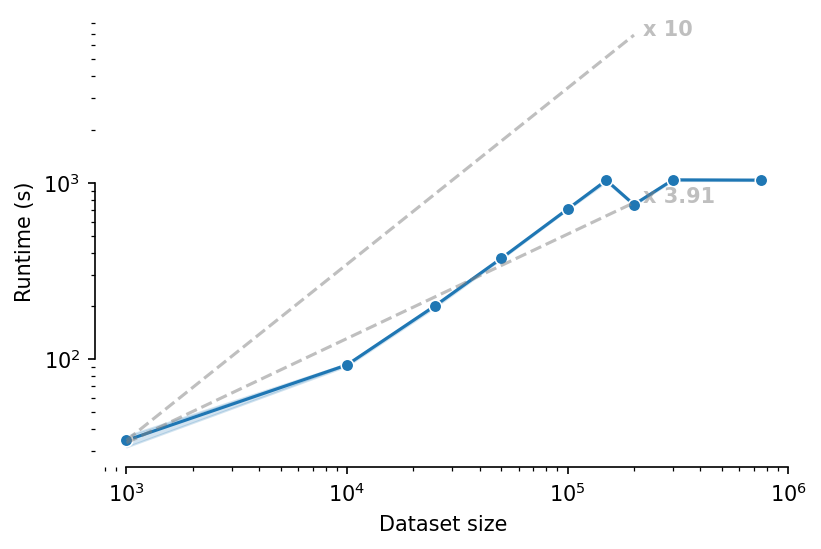

In [12]:
# 10 workers, victini, 8gb per worker

base = 10

df = pandas.concat([
    pandas.read_csv("benchmark_results/benchmark_20220117113240.csv"),
    pandas.read_csv("benchmark_results/benchmark_20220117140442.csv"),
    pandas.read_csv("benchmark_results/benchmark_20220118212224.csv")
]).reset_index(drop=True)
df["limit"] = df["limit"].astype("category")
df["limit"].cat.as_ordered()

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="limit", y="runtime", marker="o")

baseline = df[df["limit"] == 1e3]["runtime"].mean()
ax.plot((1e3, 2*1e5), (baseline, baseline*(2*1e5/1e3)), linestyle="--", color="grey", alpha=0.5)
ax.text(2*1e5 + 20000, baseline*(2*1e5/1e3), s=f"x {base}", color="grey", alpha=0.5, fontweight="semibold")

m = df.groupby("limit")["runtime"].mean()
limit_log = numpy.log(m.index.to_numpy()) / numpy.log(base)
runtime_log = numpy.log(m) / numpy.log(base)
slope, intercept = numpy.polyfit(limit_log, runtime_log, deg=1)
x_vals = numpy.array([numpy.log(1e3) / numpy.log(base), numpy.log(2*1e5) / numpy.log(base)])
y_vals = intercept + slope * x_vals
ax.plot(base**x_vals, base**y_vals, '--', color="grey", alpha=0.5)
ax.text(base**x_vals[-1] + 20000, base**y_vals[-1], "x %.2f" % base**slope, color="grey", alpha=0.5, fontweight="semibold")

ax.set_xscale("log", base=base)
ax.set_yscale("log", base=base)
seaborn.despine(ax=ax, trim=True)
ax.set_ylabel("Runtime (s)")
ax.set_xlabel("Dataset size")

plt.savefig("runtime.png")

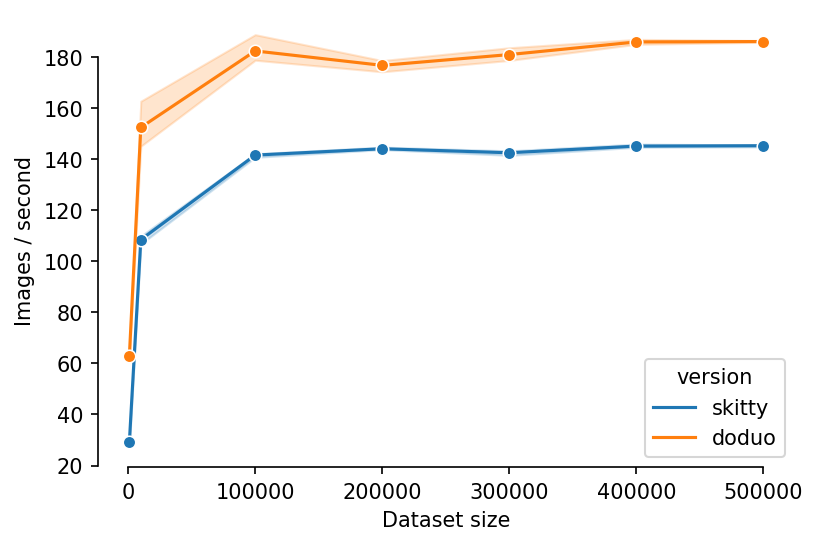

In [13]:
# 10 workers, victini, 8gb per worker

df = pandas.concat([
    pandas.read_csv("benchmark_results/benchmark_20220117113240.csv"),
    # pandas.read_csv("benchmark_results/benchmark_20220117140442.csv"),
    pandas.read_csv("benchmark_results/benchmark_20220119120857.csv"),
    pandas.read_csv("benchmark_results/benchmark_20220217113014.csv")
]).reset_index(drop=True)

df["version"] = df["output"].map(lambda a: "doduo" if "20220217113014" in a else "skitty")

df["images / second"] = df["limit"] / df["runtime"]

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="limit", y="images / second", marker="o", hue="version")

seaborn.despine(ax=ax, trim=True)
ax.set_ylabel("Images / second")
ax.set_xlabel("Dataset size")

plt.savefig("runtime.png")

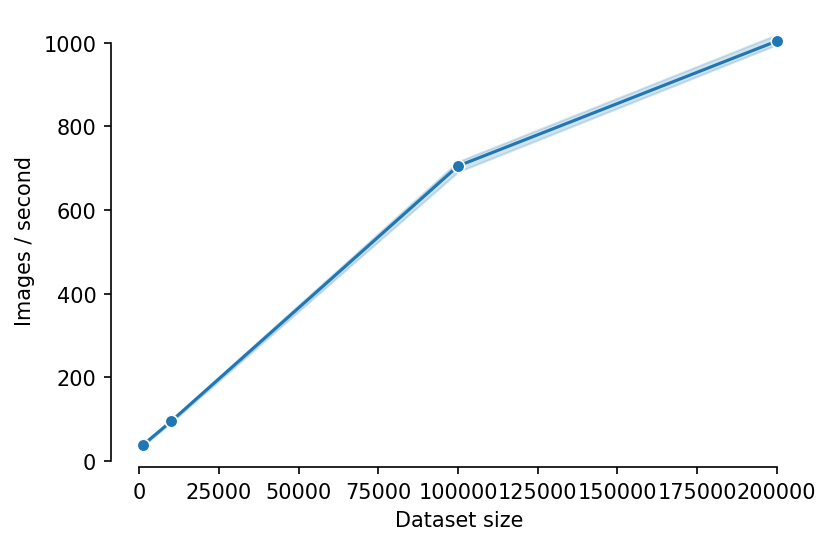

In [10]:
# 10 workers, victini, 8gb per worker with filter step

df = pandas.concat([
    pandas.read_csv("benchmark_results/benchmark_20220118212902.csv")
]).reset_index(drop=True)

df["images / second"] = df["limit"] / df["runtime"]

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="limit", y="runtime", marker="o")

seaborn.despine(ax=ax, trim=True)
ax.set_ylabel("Images / second")
ax.set_xlabel("Dataset size")

plt.savefig("runtime.png")

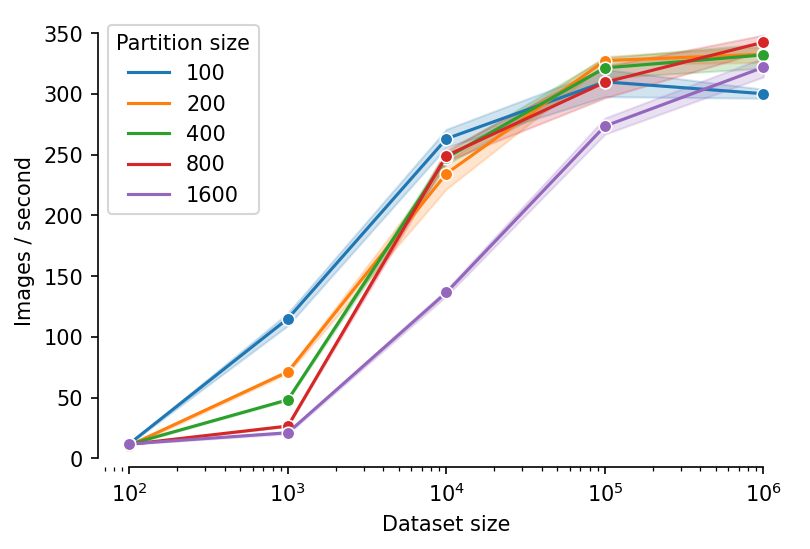

In [13]:
# latest results on doduo, SCIP v0.1.10rc2+

df = pandas.concat([
    pandas.read_csv("benchmark_results/benchmark_20220707144126.csv"),
    pandas.read_csv("benchmark_results/benchmark_20220707203407.csv")
]).reset_index(drop=True)

df["size"] = df["paths"].map(lambda a: int(Path(a[2:-2]).name[:-len(".zarr")]))
df["images / second"] = df["size"] / df["runtime"]
df["size"] = df["size"].astype('category')
df["partition_size"] = df["partition_size"].astype('category')

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="size", y="images / second", hue="partition_size", marker="o")

ax.set_xscale("log", base=10)

seaborn.despine(ax=ax, trim=True)
ax.set_ylabel("Images / second")
ax.set_xlabel("Dataset size")
ax.legend(title="Partition size")

plt.savefig("dataset_size_vs_images.png", dpi=200, bbox_inches="tight")

## Varying number of workers

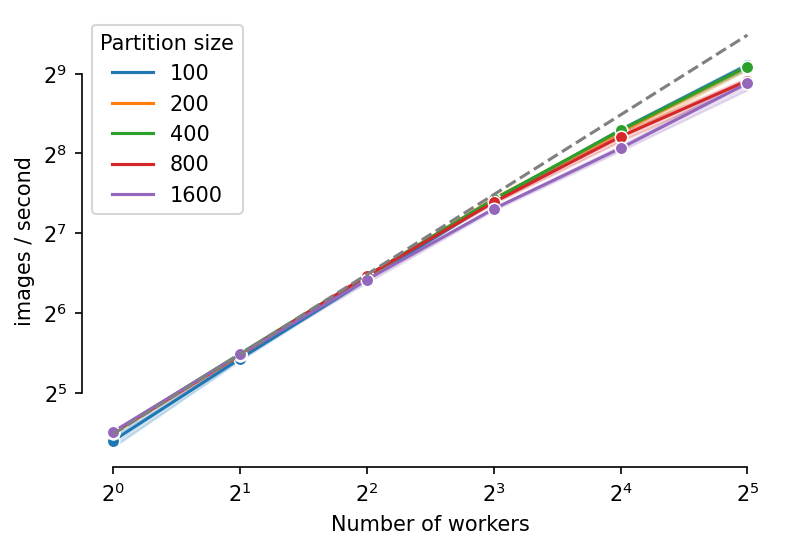

In [12]:
# latest results on doduo, SCIP v0.1.10rc2+

df = pandas.concat([
    pandas.read_csv("benchmark_results/benchmark_20220705202032.csv"),
    pandas.read_csv("benchmark_results/benchmark_20220707124333.csv")
]).reset_index(drop=True)

df["n_workers"] = df["n_workers"].astype("category")
df["partition_size"] = df["partition_size"].astype("category")
df["images / second"] = 74000 / df["runtime"]

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="n_workers", y="images / second", hue="partition_size", marker="o")

baseline = df[df["n_workers"] == 1]["images / second"].mean()
ax.plot((1, 32), (baseline, baseline*32), linestyle="--", color="grey")
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)

ax.set_xlabel("Number of workers")
ax.legend(title="Partition size")

seaborn.despine(ax=ax, trim=True)
plt.savefig("workers_vs_images.png", dpi=200, bbox_inches="tight")

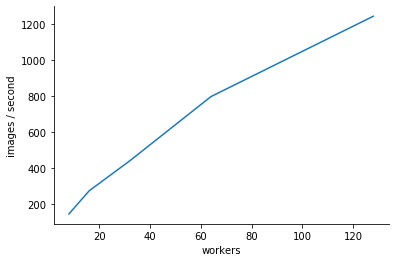

In [8]:
# multi-node doduo

data = dict(
    runtime=[354, 187, 116, 64, 41],
    nodes=[1, 2, 4, 8, 16],
    n_workers=[8]*5,
    limit=[50939]*5
)
df = pandas.DataFrame(data)
df["workers"] = df["nodes"] * df["n_workers"]
df["images / second"] = df["limit"] / df["runtime"]

ax = seaborn.lineplot(data=df, x="workers", y="images / second")
seaborn.despine(ax.figure)

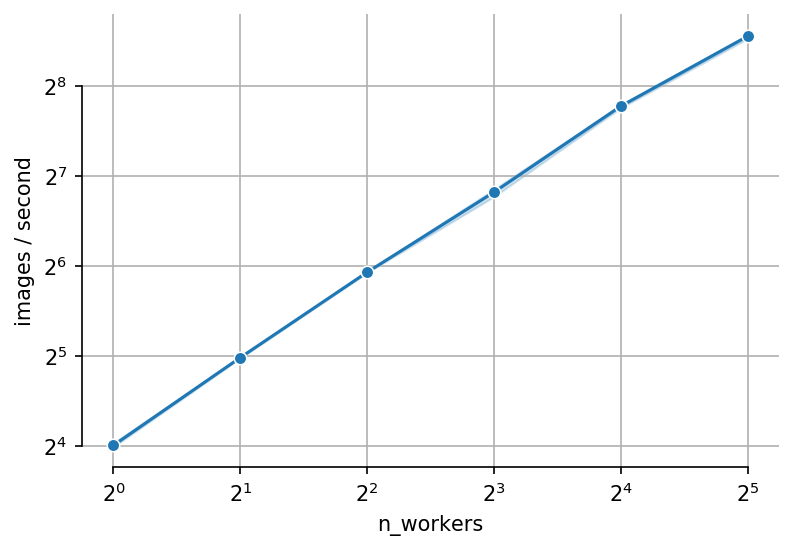

In [24]:
df = pandas.concat([
    pandas.read_csv("benchmark_results/benchmark_20220117140635.csv"),
    pandas.read_csv("benchmark_results/benchmark_20220118212229.csv")
]).reset_index(drop=True)

df["n_workers"] = df["n_workers"].astype("category")
df["images / second"] = df["limit"] / df["runtime"]

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="n_workers", y="images / second", marker="o")

ax.set_xscale("log", basex=2)
ax.set_yscale("log", basey=2)
seaborn.despine(ax=ax, trim=True)
plt.grid()

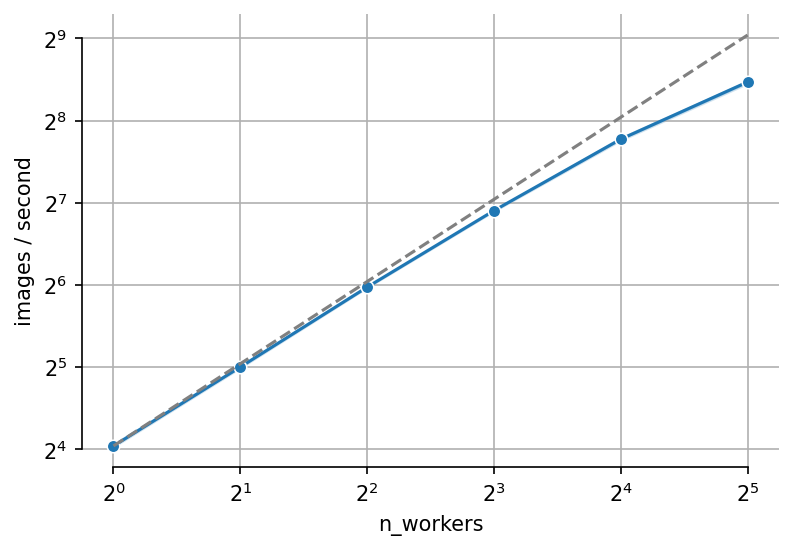

In [6]:
df = pandas.concat([
    pandas.read_csv("benchmark_results/benchmark_20220118212857.csv"),
]).reset_index(drop=True)

df["n_workers"] = df["n_workers"].astype("category")
df["images / second"] = df["limit"] / df["runtime"]

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="n_workers", y="images / second", marker="o")

baseline = df[df["n_workers"] == 1]["images / second"].mean()
ax.plot((1, 32), (baseline, baseline*32), linestyle="--", color="grey")
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
seaborn.despine(ax=ax, trim=True)
plt.grid()

Run on Breniac. Input was sample H1_T8 from EhV dataset v1, channels 1, 4, 6, 7 and 11. Persisting was enabled. Reporting was enabled.

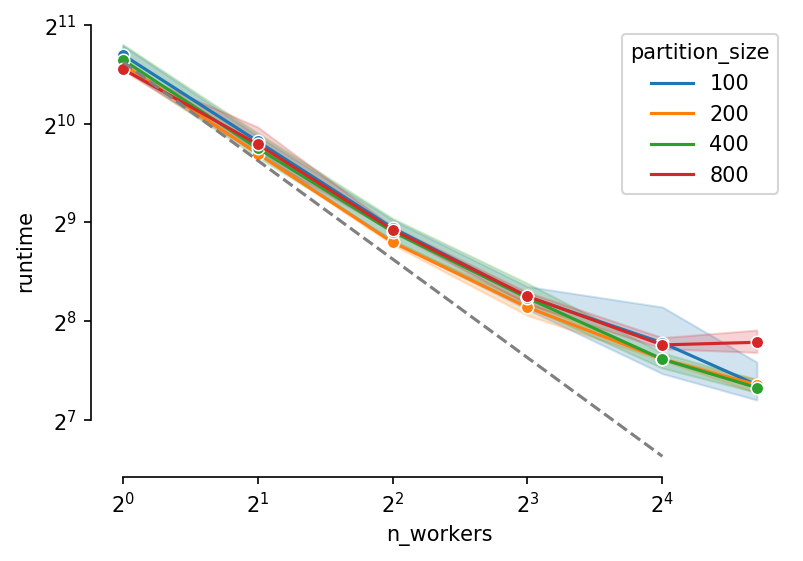

In [3]:
df = pandas.read_csv("../benchmark_results/benchmark_20210930224331.csv")
df["n_workers"] = df["n_workers"].astype("category")
df["partition_size"] = df["partition_size"].astype("category")

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="n_workers", y="runtime", hue="partition_size", marker="o")

baseline = df[df["n_workers"] == 1]["runtime"].mean()
ax.plot((1, 16), (baseline, baseline/16), linestyle="--", color="grey")
ax.set_xscale("log", basex=2)
ax.set_yscale("log", basey=2)
seaborn.despine(ax=ax, trim=True)

Run on Breniac. Input was full EhV dataset v1, channels 1, 4, 6, 7 and 11. Persisting was disabled. Reporting was disabled.

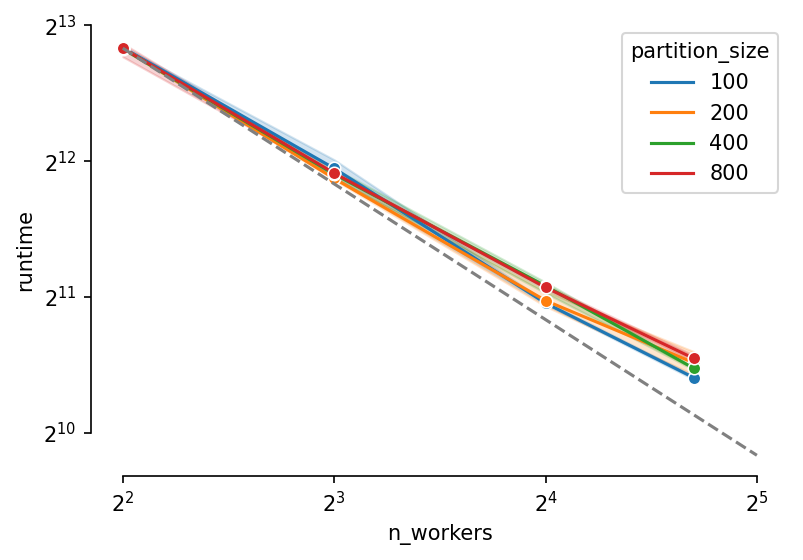

In [6]:
df = pandas.read_csv("../benchmark_results/benchmark_20211006164152.csv")
df["n_workers"] = df["n_workers"].astype("category")
df["partition_size"] = df["partition_size"].astype("category")

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="n_workers", y="runtime", hue="partition_size", marker="o")

baseline = df[df["n_workers"] == 4]["runtime"].mean()
ax.plot((4, 32), (baseline, baseline/8), linestyle="--", color="grey")
ax.set_xscale("log", basex=2)
ax.set_yscale("log", basey=2)
seaborn.despine(ax=ax, trim=True)

Run on Breniac. Input was full EhV dataset v1, channels 1, 4, 6, 7 and 11. Persisting was enabled. Reporting was disabled.

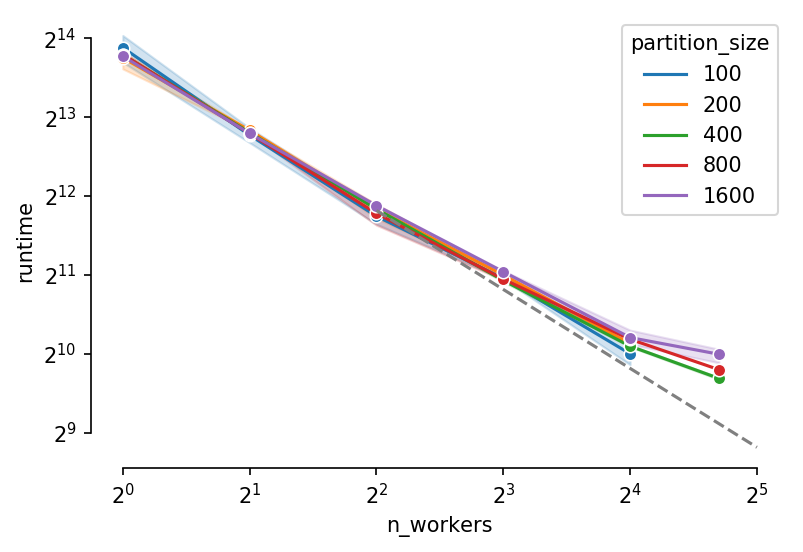

In [6]:
df = pandas.read_csv("../benchmark_results/benchmark_20211007095037.csv")
df["n_workers"] = df["n_workers"].astype("category")
df["partition_size"] = df["partition_size"].astype("category")

fig, ax = plt.subplots(dpi=150)
seaborn.lineplot(ax=ax, data=df, x="n_workers", y="runtime", hue="partition_size", marker="o")

baseline = df[df["n_workers"] == 4]["runtime"].mean()
ax.plot((4, 32), (baseline, baseline/8), linestyle="--", color="grey")
ax.set_xscale("log", basex=2)
ax.set_yscale("log", basey=2)
seaborn.despine(ax=ax, trim=True)

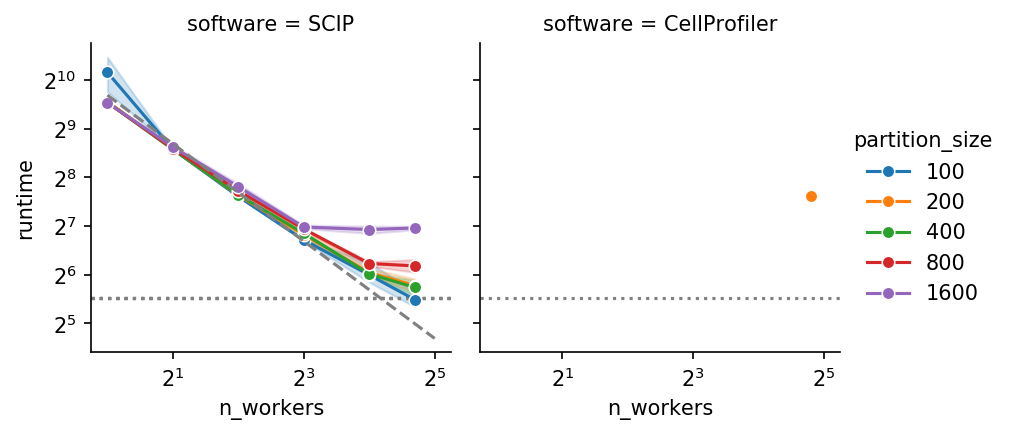

In [3]:
df = pandas.read_csv("benchmark_results/benchmark_20211101192829_R1_Inf.csv")
df["n_workers"] = df["n_workers"].astype("category")
df["software"] = "SCIP"

df_cp = pandas.DataFrame(columns=df.columns)
df_cp.loc[0, ["n_workers", "runtime", "partition_size"]] = [28, 207, 200]
df_cp.loc[1, ["n_workers", "runtime", "partition_size"]] = [28, 187, 200]
df_cp["software"] = "CellProfiler"

df = pandas.concat([df, df_cp], axis=0).reset_index(drop=True)
df["partition_size"] = df["partition_size"].astype("category")

grid = seaborn.FacetGrid(data=df, hue="partition_size", col="software")

grid.refline(y=df[(df["n_workers"] == 26) & (df["partition_size"] == 200)]["runtime"].min(), linestyle="dotted")

grid.map_dataframe(seaborn.lineplot, x="n_workers", y="runtime", marker="o")
grid.add_legend()
grid.figure.set_dpi(150)

baseline = df[(df["n_workers"] == 1) & (df["software"] =="SCIP")]["runtime"].mean()
grid.axes_dict["SCIP"].plot((1, 32), (baseline, baseline/32), linestyle="--", color="grey")
baseline = df[(df["n_workers"] == 1) & (df["software"] =="CellProfiler")]["runtime"].mean()
grid.axes_dict["CellProfiler"].plot((1, 32), (baseline, baseline/32), linestyle="--", color="grey")

for ax in grid.axes.ravel():
    ax.set_xscale("log", basex=2)
    ax.set_yscale("log", basey=2)
    seaborn.despine(ax=ax)
    
plt.savefig("benchmark.svg", transparent=True)

In [46]:
df[(df["software"] == "CellProfiler") & (df["n_workers"] == 1)]["runtime"].mean()

197.0

In [47]:
df[(df["software"] == "SCIP") & (df["n_workers"] == 1)]["runtime"].mean()

826.8963572978973